In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *        # Quick access to most common functionality
from fastai.text import *   # Quick access to NLP functionality
from pathlib import Path
from fastai.vision import *

epochs = 20

In [3]:
accuracy_list = []

In [4]:
path_clas = Path('/home/ubuntu/data/autopsy')
path_lm = Path('/home/ubuntu/data/autopsy')

batch_size=32
drop_mult=0.1
learning_rate= 1e-4
wd=1e-4
num_folds = 5

folds = ['data_suicide_homicide_k_1.csv','data_suicide_homicide_k_2.csv','data_suicide_homicide_k_3.csv','data_suicide_homicide_k_4.csv','data_suicide_homicide_k_5.csv']


In [5]:
data_lm = TextLMDataBunch.from_csv(path_lm, 'data_suicide_homicide_combined_train_test.csv', classes=['Suicide','Homicide'])

In [6]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[0], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_autopsy_not_pretrained')

learn.freeze()



In [7]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


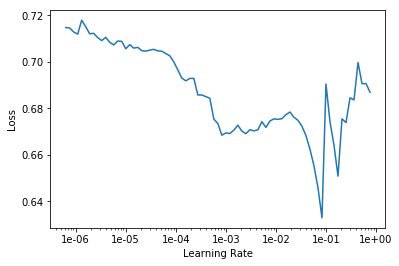

In [8]:
learn.recorder.plot()

In [9]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:26
epoch  train_loss  valid_loss  accuracy
1      0.677389    0.633342    0.710145  (00:06)
2      0.639989    0.554597    0.768116  (00:06)
3      0.589068    0.531825    0.763285  (00:07)
4      0.604863    0.499411    0.782609  (00:06)



In [10]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 05:53
epoch  train_loss  valid_loss  accuracy
1      0.577598    0.446199    0.811594  (00:18)
2      0.557304    0.498435    0.797101  (00:19)
3      0.530034    0.427127    0.850242  (00:18)
4      0.532530    0.394889    0.855072  (00:17)
5      0.454029    0.436710    0.816425  (00:20)
6      0.480457    0.410986    0.826087  (00:14)
7      0.430075    0.397202    0.850242  (00:17)
8      0.425067    0.464688    0.806763  (00:17)
9      0.431223    0.367052    0.879227  (00:16)
10     0.407498    0.379441    0.855072  (00:16)
11     0.402922    0.354291    0.879227  (00:16)
12     0.338762    0.348224    0.864734  (00:20)
13     0.367116    0.354457    0.855072  (00:15)
14     0.358575    0.333308    0.874396  (00:16)
15     0.357144    0.345100    0.855072  (00:16)
16     0.345859    0.372325    0.859903  (00:16)
17     0.320234    0.308819    0.874396  (00:19)
18     0.321808    0.317430    0.874396  (00:16)
19     0.289458    0.366368    0.879227  (00:18)
20     0.28

In [11]:
learn.validate()

[0.3883986, tensor(0.8647)]

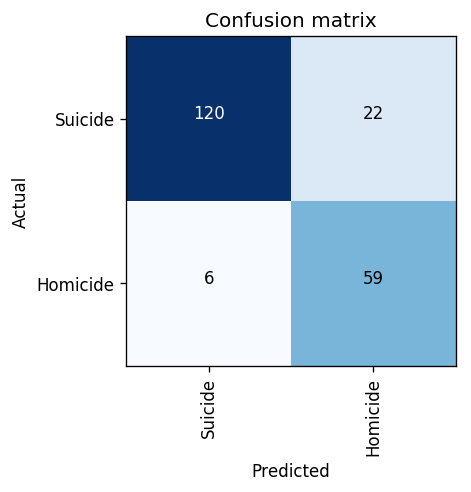

In [12]:
accuracy_list.append(learn.validate()[1].item())
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

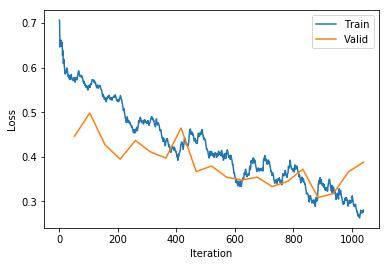

In [13]:
learn.recorder.plot_losses()

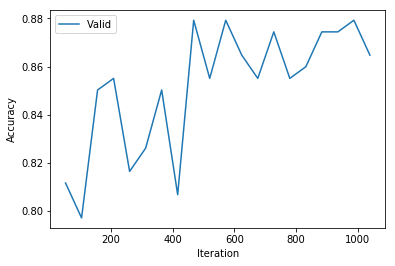

In [14]:
learn.recorder.plot_metrics()

In [15]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[1], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_autopsy_not_pretrained')

learn.freeze()



In [16]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


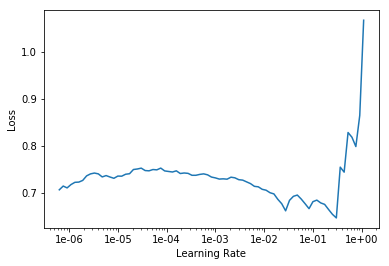

In [17]:
learn.recorder.plot()

In [18]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:27
epoch  train_loss  valid_loss  accuracy
1      0.696890    0.638131    0.652174  (00:06)
2      0.652815    0.643282    0.632850  (00:06)
3      0.634877    0.627020    0.661836  (00:07)
4      0.604760    0.598918    0.695652  (00:07)



In [19]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 06:04
epoch  train_loss  valid_loss  accuracy
1      0.587042    0.602498    0.705314  (00:17)
2      0.557976    0.527921    0.743961  (00:18)
3      0.526483    0.507030    0.777778  (00:16)
4      0.480565    0.456955    0.830918  (00:18)
5      0.462071    0.451113    0.816425  (00:19)
6      0.448065    0.404462    0.821256  (00:17)
7      0.395493    0.384263    0.859903  (00:19)
8      0.346985    0.473792    0.797101  (00:20)
9      0.347740    0.379454    0.855072  (00:18)
10     0.341998    0.400153    0.845411  (00:18)
11     0.353422    0.365123    0.850242  (00:17)
12     0.320474    0.346587    0.840580  (00:18)
13     0.329122    0.313761    0.850242  (00:17)
14     0.316640    0.354674    0.869565  (00:17)
15     0.317350    0.379537    0.830918  (00:17)
16     0.277038    0.365878    0.850242  (00:19)
17     0.291720    0.337158    0.855072  (00:17)
18     0.298095    0.340091    0.850242  (00:17)
19     0.263639    0.502690    0.826087  (00:19)
20     0.28

In [20]:
learn.validate()

[0.3446646, tensor(0.8502)]

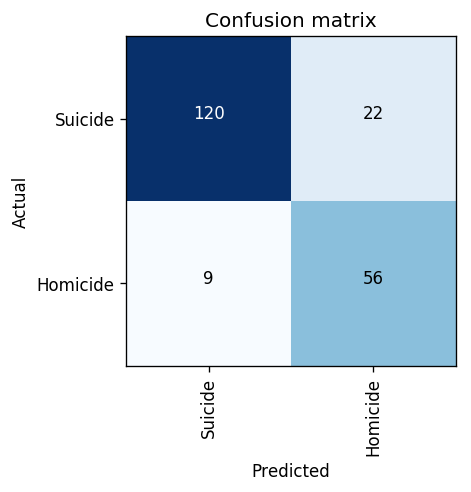

In [21]:
accuracy_list.append(learn.validate()[1].item())
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

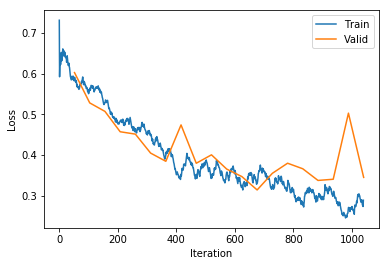

In [22]:
learn.recorder.plot_losses()

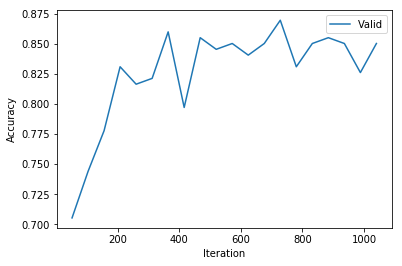

In [23]:
learn.recorder.plot_metrics()

In [24]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[2], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_autopsy_not_pretrained')

learn.freeze()



In [25]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


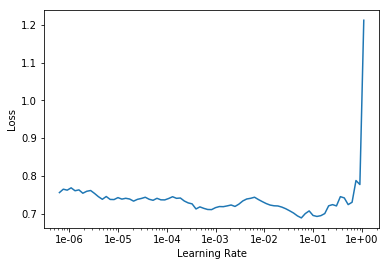

In [26]:
learn.recorder.plot()

In [27]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:28
epoch  train_loss  valid_loss  accuracy
1      0.668753    0.547658    0.787440  (00:07)
2      0.681466    0.563322    0.739130  (00:06)
3      0.655260    0.567142    0.743961  (00:07)
4      0.610632    0.528548    0.777778  (00:07)



In [28]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 05:47
epoch  train_loss  valid_loss  accuracy
1      0.618496    0.546102    0.782609  (00:17)
2      0.594549    0.521764    0.787440  (00:15)
3      0.503530    0.472514    0.811594  (00:20)
4      0.497030    0.474190    0.835749  (00:19)
5      0.513825    0.433010    0.845411  (00:16)
6      0.499437    0.468537    0.816425  (00:15)
7      0.488964    0.513854    0.797101  (00:15)
8      0.437493    0.396972    0.840580  (00:19)
9      0.446840    0.410169    0.830918  (00:15)
10     0.388745    0.442029    0.830918  (00:19)
11     0.362391    0.366644    0.864734  (00:18)
12     0.396256    0.514519    0.801932  (00:15)
13     0.369223    0.386178    0.840580  (00:16)
14     0.344538    0.341657    0.874396  (00:16)
15     0.360967    0.327104    0.869565  (00:14)
16     0.324628    0.334375    0.840580  (00:17)
17     0.296112    0.383604    0.855072  (00:19)
18     0.322176    0.376094    0.864734  (00:16)
19     0.331616    0.302259    0.874396  (00:15)
20     0.29

In [29]:
learn.validate()

[0.37281048, tensor(0.8647)]

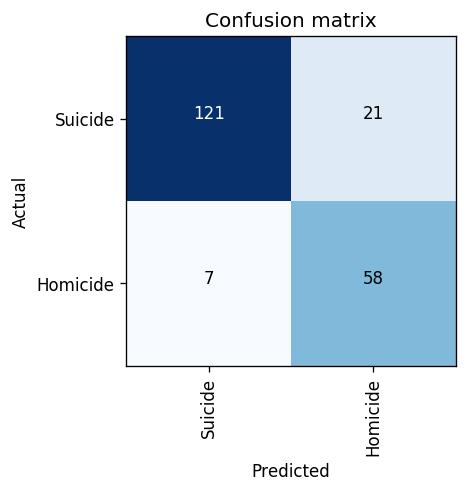

In [30]:
accuracy_list.append(learn.validate()[1].item())
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

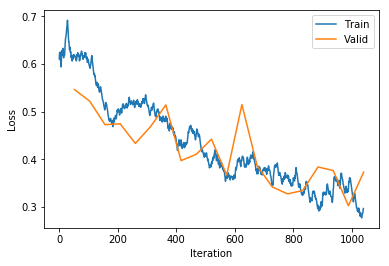

In [31]:
learn.recorder.plot_losses()

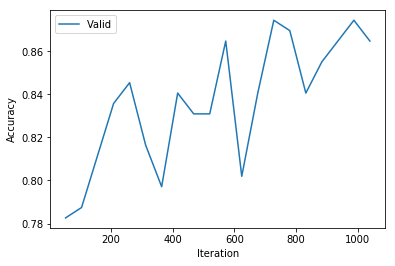

In [32]:
learn.recorder.plot_metrics()

In [33]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[3], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_autopsy_not_pretrained')

learn.freeze()



In [34]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


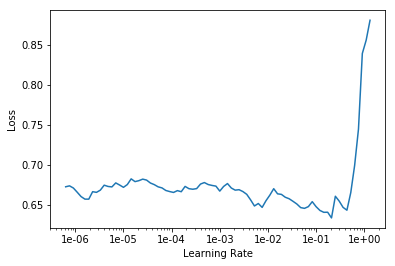

In [35]:
learn.recorder.plot()

In [36]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:27
epoch  train_loss  valid_loss  accuracy
1      0.621011    0.568544    0.729469  (00:07)
2      0.594296    0.548203    0.729469  (00:06)
3      0.566501    0.515018    0.763285  (00:06)
4      0.543514    0.488714    0.787440  (00:07)



In [37]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 05:54
epoch  train_loss  valid_loss  accuracy
1      0.538292    0.451158    0.826087  (00:20)
2      0.468958    0.440813    0.816425  (00:19)
3      0.439526    0.423865    0.830918  (00:19)
4      0.452029    0.384848    0.845411  (00:16)
5      0.415318    0.373592    0.850242  (00:17)
6      0.358177    0.392868    0.859903  (00:20)
7      0.399677    0.358810    0.884058  (00:15)
8      0.360801    0.349522    0.879227  (00:19)
9      0.394488    0.301718    0.879227  (00:15)
10     0.367045    0.316235    0.888889  (00:17)
11     0.353471    0.327359    0.879227  (00:17)
12     0.335339    0.334644    0.888889  (00:17)
13     0.271344    0.319208    0.888889  (00:19)
14     0.317709    0.304218    0.879227  (00:16)
15     0.337413    0.339717    0.859903  (00:15)
16     0.283797    0.288080    0.888889  (00:18)
17     0.313415    0.301888    0.888889  (00:15)
18     0.290710    0.364386    0.864734  (00:16)
19     0.289713    0.321309    0.884058  (00:17)
20     0.30

In [38]:
learn.validate()

[0.39770263, tensor(0.8309)]

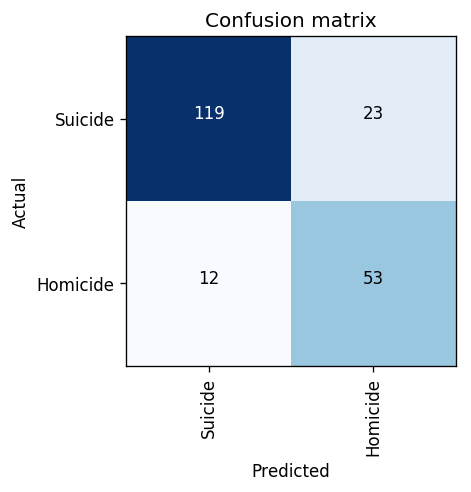

In [39]:
accuracy_list.append(learn.validate()[1].item())
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

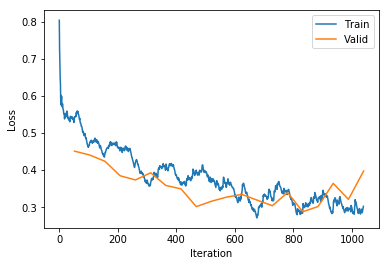

In [40]:
learn.recorder.plot_losses()

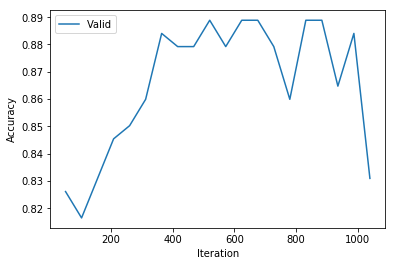

In [41]:
learn.recorder.plot_metrics()

In [42]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[4], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_autopsy_not_pretrained')

learn.freeze()



In [43]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


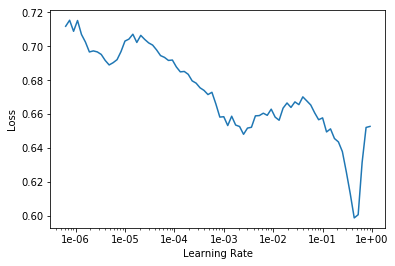

In [44]:
learn.recorder.plot()

In [45]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:27
epoch  train_loss  valid_loss  accuracy
1      0.664211    0.650326    0.657005  (00:06)
2      0.602770    0.574840    0.685990  (00:07)
3      0.576336    0.594079    0.690821  (00:06)
4      0.554735    0.532654    0.734300  (00:06)



In [46]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 05:54
epoch  train_loss  valid_loss  accuracy
1      0.594938    0.493748    0.782609  (00:15)
2      0.528843    0.435304    0.826087  (00:18)
3      0.487575    0.395884    0.835749  (00:20)
4      0.500532    0.423197    0.835749  (00:16)
5      0.434965    0.389878    0.874396  (00:19)
6      0.410017    0.357723    0.869565  (00:19)
7      0.423489    0.348143    0.859903  (00:16)
8      0.384065    0.359840    0.864734  (00:18)
9      0.396184    0.364776    0.850242  (00:15)
10     0.351151    0.409311    0.840580  (00:18)
11     0.324580    0.383643    0.850242  (00:19)
12     0.308001    0.360685    0.850242  (00:18)
13     0.355775    0.341168    0.869565  (00:15)
14     0.317402    0.323934    0.859903  (00:19)
15     0.335577    0.333602    0.869565  (00:16)
16     0.266309    0.312848    0.879227  (00:19)
17     0.313650    0.406077    0.835749  (00:16)
18     0.339996    0.315684    0.864734  (00:15)
19     0.306324    0.327121    0.874396  (00:15)
20     0.27

In [47]:
learn.validate()

[0.30856255, tensor(0.8696)]

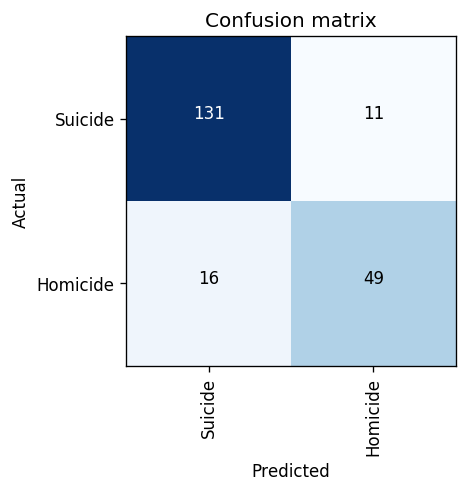

In [48]:
accuracy_list.append(learn.validate()[1].item())
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

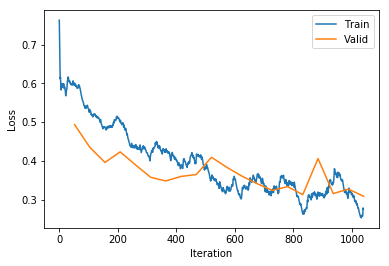

In [49]:
learn.recorder.plot_losses()

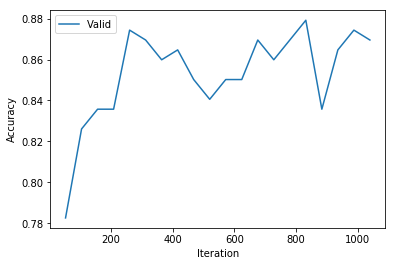

In [50]:
learn.recorder.plot_metrics()

In [51]:
print(accuracy_list)

[0.8647342920303345, 0.8502415418624878, 0.8647342920303345, 0.8309178948402405, 0.8695651888847351]


In [52]:
print(sum(accuracy_list)/len(accuracy_list))

0.8560386419296264


In [53]:
#We are now done doing 5-fold cross validation 

In [54]:
#Now train with all the training data and evaluate with the test data

In [55]:
data_clas = TextClasDataBunch.from_csv(path_clas,'data_suicide_homicide_combined_train_test.csv', vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_autopsy_not_pretrained')

learn.freeze()


In [56]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:33
epoch  train_loss  valid_loss  accuracy
1      0.635937    0.535246    0.752896  (00:08)
2      0.624421    0.494178    0.799228  (00:07)
3      0.588651    0.454910    0.849421  (00:08)
4      0.606803    0.509480    0.787645  (00:07)



In [57]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 07:06
epoch  train_loss  valid_loss  accuracy
1      0.561813    0.450839    0.826255  (00:22)
2      0.559029    0.375133    0.861004  (00:19)
3      0.535972    0.341975    0.891892  (00:21)
4      0.467548    0.379669    0.849421  (00:23)
5      0.443709    0.455773    0.837838  (00:22)
6      0.450614    0.399303    0.853282  (00:21)
7      0.409829    0.317618    0.872587  (00:20)
8      0.423985    0.361898    0.872587  (00:18)
9      0.372912    0.321385    0.888031  (00:22)
10     0.315953    0.284337    0.891892  (00:24)
11     0.301739    0.334448    0.884170  (00:23)
12     0.328726    0.258412    0.907336  (00:19)
13     0.328077    0.299652    0.895753  (00:21)
14     0.292377    0.255824    0.907336  (00:21)
15     0.334865    0.293733    0.895753  (00:19)
16     0.287765    0.267098    0.903475  (00:21)
17     0.276382    0.254217    0.915058  (00:21)
18     0.321539    0.300729    0.891892  (00:18)
19     0.289190    0.257772    0.895753  (00:20)
20     0.29

In [58]:
learn.validate()

[0.22239608, tensor(0.9305)]

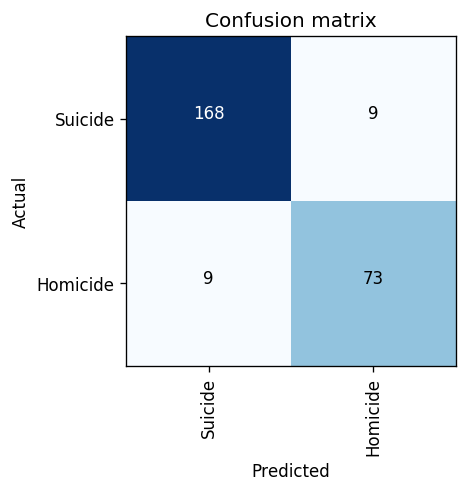

In [59]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

In [60]:
import torch

torch.cuda.empty_cache()